In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [189]:
np.random.seed(123)
df = pd.read_csv("C:/Users/Student/Desktop/dummyaaawithouttextmining.csv")
y = df['stars_review']
#y = y.values
X = df.drop(['stars_review'], axis=1)


In [190]:
X.columns

Index(['business_id', 'user_id', 'funny_review', 'useful_review',
       'cool_review', 'checkin_all', 'average_stars_x', 'review_count_user',
       'funny_user', 'useful_user',
       ...
       'Cambodian', 'Tea.Rooms', 'Scandinavian', 'Piano.Bars', 'Brazilian',
       'Argentine', 'Cocktail.Bars', 'Laotian', 'stars_business',
       'male/Female'],
      dtype='object', length=116)

In [191]:
busi_factorized=pd.factorize(X['business_id'])
X['business_id']=busi_factorized[0]
user_factorized=pd.factorize(X['user_id'])
X['user_id']=user_factorized[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [192]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
data_train = xgb.DMatrix( X_train, label=y_train)
data_test  = xgb.DMatrix( X_test, label=y_test)

C:\Users\Student\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [206]:

#給予模型參數，告知演算法該如何訓練模型
#optimized param = {'learning_rate': 0.07, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
#'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 2, 'reg_lambda': 2}
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'reg:linear' 
#param['objective']='multi:softmax'
#param['num_class']= 6
param['tree_method'] = 'hist'
param['silent']=1
param['max_depth']=10
param['min_child_weight'] = 4
param['subsample']=0.7
#param['colsample_bytree']=0.8
param['eta']=0.02
param['gamma']=0.5
#param['learning_rate']=0.07
#param['reg_alpha']=2
#param['reg_lambda']=2
#param['n_estimators']=400
eval_list  = [(data_train,'train'),(data_test,'test')]
num_round = 250
eval_history={}

# 訓練模型
model = xgb.train( param, data_train, num_round,eval_list,
                  evals_result=eval_history,verbose_eval=False)

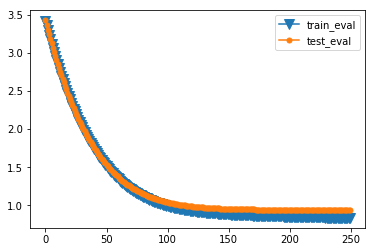

In [207]:
rmse_train=eval_history['train']['rmse']
rmse_test=eval_history['test']['rmse']
plt.plot(rmse_train,ms=10,marker='v',label='train_eval')
plt.plot(rmse_test,ms=10,marker='.',label='test_eval')
plt.legend()
plt.show()

In [208]:
model.eval(data_test)

'[0]\teval-rmse:0.938897'

In [209]:
from sklearn.metrics import r2_score, accuracy_score
testY_pred=model.predict(data_test)
r2_score(y_test, testY_pred)

0.3566627050497039

In [210]:
trainY_pred=model.predict(data_train)
r2_score(y_train,trainY_pred)

0.496789114968861

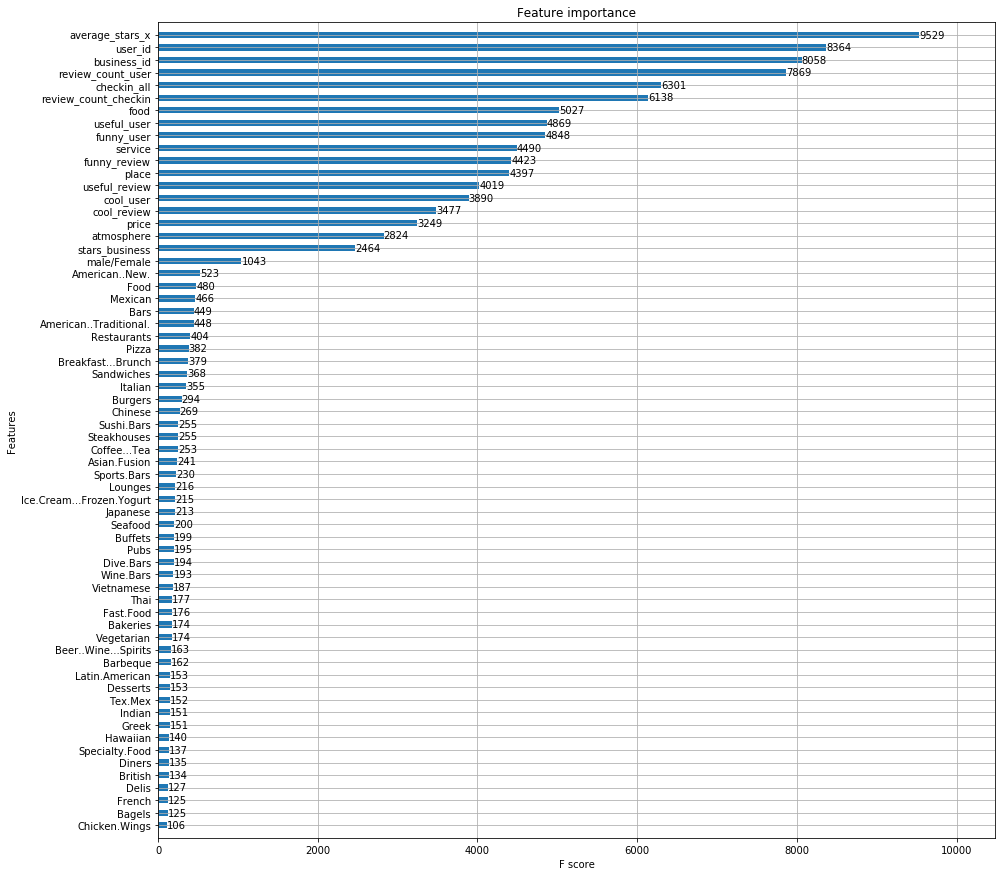

In [217]:
from xgboost import plot_importance

fig,ax=plt.subplots(figsize=(15,15))
plot_importance(model,height=0.5,ax=ax,max_num_features=64)
plt.show()